In [ ]:
from collections import defaultdict
import random
from collections import deque
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
#@title Graph
class Graph():
  def __init__(self):
    self.graph = defaultdict(list)
    self.size = 50

  def addEdge(self,u,v): #creates adjacency list for the graph
    self.graph[u].append(v)
    self.graph[v].append(u)
    if u==1:
      self.graph[u].append(self.size)
    if v== self.size:
      self.graph[v].append(1)
    
  def valid_node_convert(self, i): #converts node in the range 1,50
    if i>self.size: 
      i=i%self.size
    if i<0:
      i=(self.size)+i
    if i==0:
      i=self.size
    return i

  def check_edge(self, random_node1): #checks whether any more edgses can be formed in the graph
    counter=0
    for i in range(random_node1-5, random_node1+6):
      adj_1=self.valid_node_convert(random_node1-1)
      adj_2=self.valid_node_convert(random_node1+1)
      i=self.valid_node_convert(i)
      if i!=random_node1 and i!=adj_1 and i!=adj_2 and len(g.graph[i])==3:
        counter+=1
    if counter==8:
      return False #No more edges can be formed
    else:
      return True

  def increaseEdge(self): #to add edges in the graph
    #probabilistic increasing edges
    edge_exists=True
    counter=0
    while(edge_exists):
      degree1=3
      flag=True
      while degree1>=3 and flag: #check if degree of the node picked is less then 3
        random_node1=random.randint(1,self.size)
        degree1=len(self.graph[random_node1])
        edge_exists=self.check_edge(random_node1)
        if edge_exists:
          if degree1>=3:
            continue
        # edge_exists=self.check_edge(random_node1)
        # if edge_exists:
          val1=random_node1-5
          val2=random_node1+5
          degree2=3
          while degree2>=3: #check if degree of 2nd node picked is less then 3
            random_node2=random.randint(val1,val2+1)
            random_node2=self.valid_node_convert(random_node2)
            while random_node2==random_node1: #node 1 and node 2 shoud not be the same nodes
              random_node2=random.randint(val1,val2+1)
              random_node2=self.valid_node_convert(random_node2)
            degree2=len(self.graph[random_node2])
            if degree2>=3: #if degree of node2 is greater then 3, re-choose the node2
              continue
            else:
              break  
          flag=False
        else: #no edges can be formed
          break
      if edge_exists: # add the edges in the adjacency list
        if random_node1-1!=random_node2 and (random_node1+1)%self.size!=random_node2:
          g.graph[random_node1].append(random_node2)
          g.graph[random_node2].append(random_node1)
          counter+=1
    # return counter
g = Graph()
for i in range(1, g.size):
    g.addEdge(i,i+1)
g.increaseEdge()
print(g.graph)
# a=[]
# g = Graph()
# for i in range(1,7000):
#   g = Graph()
#   count=0
#   for i in range(1, g.size):
#       g.addEdge(i,i+1)
#   a.append(g.increaseEdge())
# print(max(a))
# print(min(a))
# print(a)

defaultdict(<class 'list'>, {1: [2, 50, 49], 2: [1, 3, 6], 3: [2, 4, 7], 4: [3, 5], 5: [4, 6, 11], 6: [5, 7, 2], 7: [6, 8, 3], 8: [7, 9], 9: [8, 10, 12], 10: [9, 11, 13], 11: [10, 12, 5], 12: [11, 13, 9], 13: [12, 14, 10], 14: [13, 15, 16], 15: [14, 16, 17], 16: [15, 17, 14], 17: [16, 18, 15], 18: [17, 19, 22], 19: [18, 20], 20: [19, 21], 21: [20, 22], 22: [21, 23, 18], 23: [22, 24, 27], 24: [23, 25], 25: [24, 26], 26: [25, 27], 27: [26, 28, 23], 28: [27, 29, 34], 29: [28, 30, 31], 30: [29, 31, 33], 31: [30, 32, 29], 32: [31, 33, 37], 33: [32, 34, 30], 34: [33, 35, 28], 35: [34, 36, 40], 36: [35, 37], 37: [36, 38, 32], 38: [37, 39, 42], 39: [38, 40, 41], 40: [39, 41, 35], 41: [40, 42, 39], 42: [41, 43, 38], 43: [42, 44], 44: [43, 45, 48], 45: [44, 46], 46: [45, 47], 47: [46, 48], 48: [47, 49, 44], 49: [48, 50, 1], 50: [49, 1]})


In [ ]:
#@title Prey
class Prey():
  def __init__(self): #choose prey randomly from the nodes
    self.node = random.randrange(1, g.size+1)
  
  def move_prey(self): 
    #the prey choosing uniformly randomly from its neighbours/stay at current node
    adj_nodes=[]
    adj_nodes = g.graph[self.node].copy()
    adj_nodes.append(self.node) 
    self.node = adj_nodes[random.randrange(0, len(adj_nodes))]
prey=Prey()
print(prey.node)

25


In [ ]:
#@title Predator
class Predator():
  def __init__(self): #randomly chooses predator from nodes
    self.node = random.randrange(1, g.size+1)
  
  def move_predator(self, agent_pos):
    #the predator choosing uniformly randomly from its neighbours on the path to the agent
    status, path = com_func.bfs(self.node, agent_pos)
    if status:
      if len(path)>=2:
        self.node = path[1]
      else:
        self.node=agent_pos
    else: #it will always find a path, its a cycle
      print("Something went wrong with Predator")

  def distracted_move_predator(self,agent_pos):
    #the predator choosing uniformly randomly from its neighbours on the path to the agent with 0.4 probability of being ditracted to its neighbours
    status, path = com_func.bfs(self.node, agent_pos)
    if random.random()>0.4:
      if status:
        self.node = path[1]
      else: #it will always find a path, its a cycle
        print("Something went wrong with Predator")
    else:
      adj_nodes=g.graph[agent_pos].copy()
      self.node=adj_nodes[random.randint(len(adj_nodes))]

predator=Predator()
print(predator.node)

33


In [ ]:
#@title Common Functions
class common_functions():
  def __init__(self):
    self.depth = {}
    
  def bfs(self, node, end): #find the shortest path between two nodes using BFS
    path=[]
    queue = deque()
    queue.append(node)
    parent = {}
    visited= set()
    while len(queue) > 0:
      current = queue.popleft()
      visited.add(current)
      if current == end:
        path = self.backtrace(parent, node, current) #finding the path by backtracking
        return True, path
      #find adj nodes
      adj_nodes= g.graph[current].copy()
      for adj_node in adj_nodes:
        if adj_node not in visited:
          queue.append(adj_node)
          visited.add(adj_node)
          parent[adj_node] = current
    return False, []

  def backtrace(self, parent, start, end): #finding path by backtracking
    path = [end]
    while path[-1] != start:
      path.append(parent[path[-1]])
    path.reverse()
    return path

  def findShortestPaths(self, node1, node2):
    self.bfs_label(node1, node2)
    paths = self.dfs2(node1, node2)
    all = list(paths)
    predator_movements = []
    # for path in all:
    #   if path[1] not in predator_movements:
    #     predator_movements.append(path[1])
    # return predator_movements
    for path in all:
      if len(path)>=2 and path[1] not in predator_movements:
        predator_movements.append(path[1])
      elif len(path)==1:
        predator_movements.append(node2)
    return predator_movements
  
  def dfs2(self, node, end, path=None):
    if path is None:
        path = []
    path.append(node)
    if node == end:
        yield tuple(path)
    else:
        for neighbor in g.graph[node].copy():
            if neighbor in self.depth and self.depth[neighbor] == self.depth[node]+1:
                for sp in self.dfs2(neighbor, end, path):
                    yield sp
    path.pop()

  def bfs_label(self, start, end):
    self.depth = {start: 0}
    nodes = [start]
    while nodes:
      for node in nodes:
        if node == end:
            return self.depth
        for neighbor in g.graph[node].copy():
            if neighbor not in self.depth:
                self.depth[neighbor] = self.depth[node] + 1
                nodes.append(neighbor)

com_func=common_functions()

In [ ]:
#@title Agent1
class Agent1():
  def __init__(self): #randomly choose agent from 50 nodes
    self.node = random.randrange(1, g.size+1)

  def move_agent(self): #move agent checks for its neighbours and breaks ties
    neighbours=g.graph[self.node].copy()
    combined_dist = {}
    statusPrey, path_to_prey = com_func.bfs(self.node, prey.node) #prey distance to agent
    statusPred, path_to_predator = com_func.bfs(self.node, predator.node)#predator distance to agent
    curr_preyDist, curr_predatorDist  = len(path_to_prey), len(path_to_predator)
    
    for neighbour in neighbours:
      status1, path1 = com_func.bfs(neighbour, prey.node) #prey distance to neighbour of the agent
      status2, path2 = com_func.bfs(neighbour, predator.node) #predator distance to neighbour of the agent
      combined_dist[neighbour] = [len(path1), len(path2)]
    options = {}
    for node, dist in combined_dist.items () :#breaking ties as given in the writeup
      if curr_preyDist > dist[0] and curr_predatorDist < dist[1]: # Case 1 and 2 combined
        options [node] = dist
      elif curr_preyDist  >= dist[0] and curr_predatorDist <= dist[1]: # Case 3 and 4
        options [node]= dist
      elif curr_predatorDist  <= dist[1]: # case 5 and 6
        options[node]= dist
      
    d = sorted(options.items(), key=lambda item: (item[1][0], -item[1][1]))
    if len(d) != 0:
      self.node = d[0][0]
      
agent1 = Agent1()  

In [ ]:
#@title Game Results for Agent1
total_wins, total_losses = 0,0
simulation_hung=0
for j in range(30): #simulating for 30 different graphs
  win, lose =0,0
  g = Graph()
  for i in range(1, g.size):
      g.addEdge(i,i+1)
  g.increaseEdge()
  for i in range(1,101): #simulating 100 times for each graph
    agent = Agent1()
    predator = Predator()
    prey = Prey()
    timestep=0
    while agent.node!=prey.node and agent.node!=predator.node: #end when agent catches the prey or when predator catches the agent
      agent.move_agent()
      predator.move_predator(agent.node)
      prey.move_prey()
      timestep+=1
      if timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
        simulation_hung+=1
        break
    if agent.node==prey.node:
      win += 1
    else:
      lose += 1
  total_losses += lose
  total_wins += win

print("Wins: ", total_wins, "Losses: ", total_losses)
print("Number of times Simulation Hung", simulation_hung)


Wins:  2687 Losses:  313
Number of times Simulation Hung 0


In [ ]:
#@title Agent2
class Agent2():
  def __init__(self): #randomly choose agent from 50 nodes
    self.node = random.randrange(1, g.size+1)

  def move_agent(self): #move agent checks for its neighbours and breaks ties
    neighbours=g.graph[self.node].copy()
    combined_dist = {}
    statusPrey, path_to_prey = com_func.bfs(self.node, prey.node) #prey distance to agent
    statusPred, path_to_predator = com_func.bfs(self.node, predator.node) #predator distance to agent
    curr_preyDist, curr_predatorDist = len(path_to_prey), len(path_to_predator)

    flag=False
    for neighbour in neighbours:
      status1, path1 = com_func.bfs(neighbour, prey.node) #prey distance to neighbour of the agent
      status2, path2 = com_func.bfs(neighbour, predator.node) #predator distance to neighbour of the agent
      combined_dist[neighbour] = [len(path1), len(path2)]
      if len(path2)==1: #If the predator is one node close to the agent then move away from the predator
        flag=True
    if flag==False:
      options = {}
      for node, dist in combined_dist.items () :
        if curr_preyDist > dist[0] and curr_predatorDist < dist[1]: # Case 1 and 2 combined
          options [node] = dist
        elif curr_preyDist  >= dist[0] and curr_predatorDist <= dist[1]: # Case 3 and 4
          options [node]= dist
        elif curr_predatorDist  <= dist[1]: # case 5 and 6
          options[node]= dist
        
      d = sorted(options.items(), key=lambda item: (item[1][0], -item[1][1]))
      if len(d) != 0:
        self.node = d[0][0]
    else:
      maxi, max_node=0,0 #from the neighbours find the one which is furthest from the predator
      for node, dist in combined_dist.items():
        if dist[1]>maxi: 
          maxi, max_node=dist[1], node
      self.node=max_node

agent2 = Agent2()

In [ ]:
#@title Game Results for Agent2
total_wins, total_losses = 0,0
simulation_hung=0
for j in range(30): #simulating for 30 different graphs
  win, lose =0,0
  g = Graph()
  for i in range(1, g.size):
      g.addEdge(i,i+1)
  g.increaseEdge()
  for i in range(1,101): #simulating 100 times for each graph
    agent = Agent2()
    predator = Predator()
    prey = Prey()
    timestep=0
    while agent.node!=prey.node and agent.node!=predator.node: #end when agent catches the prey or when predator catches the agent
      agent.move_agent()
      predator.move_predator(agent.node)
      prey.move_prey()
      timestep+=1
      if timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
        simulation_hung+=1
        break
    if agent.node==prey.node:
      win += 1
    else:
      lose += 1
  total_losses += lose
  total_wins += win

print("Wins: ", total_wins, "Losses: ", total_losses)
print("Number of times Simulation Hung", simulation_hung)

Wins:  2853 Losses:  147
Number of times Simulation Hung 0


In [ ]:
#@title Calculating Bayesian Probabilities for the Prey
class BayesianPrey():
  def __init__(self): #initialising belief states now and at next timestep
    self.belief_state = {}
    self.belief_state_t = {}

  def initialBeliefState(self, agent_pos): #belief state at start with no survey node
    for i in range(1, g.size+1):
      if i == agent_pos:
        self.belief_state[i] = 0
      else:
        self.belief_state[i] = round(1/(g.size-1),3) #P(node)=1/49
    self.belief_state_t = self.belief_state.copy()
  
  #for finding propagating probablities for when the survey node finds the prey for the first time
  def marginalization(self, surveyNode, preyPos):
    for i in range(1, g.size+1):
      prob = round(self.belief_state[i]/(len(g.graph[i])+1),3)
      for neighbour in g.graph[i]:
        prob += round(self.belief_state[neighbour]/(len(g.graph[neighbour])+1),3)
        self.belief_state_t[i] = round(prob,3)

  def conditionalFactoring(self,surveyNode, preyPos, prey_found, prey_found_count):
    if surveyNode == preyPos: #if prey found we update present belief state i.e., P(surveynode)=1
      prey_found_count+=1
      prey_found = True
      for i in range(1, g.size+1):
        if i == surveyNode:
          self.belief_state[i] = 1
        else:
          self.belief_state[i] = 0  
    else:
      if prey_found: #if prey found once and prey not at survey node, we update belief state 
        temp = self.belief_state[surveyNode]
        for i in range(1, g.size+1):
          if i == surveyNode:
            self.belief_state[i] = 0
          else:
            self.belief_state[i] = round(self.belief_state[i]/(1-temp),3) #propogate probsbilities of the surveynode to the other nodes
      else:
        for i in range(1, g.size+1): #if prey not found once and prey not at survey node, we update belief state at t
          if i == surveyNode:
            self.belief_state_t[i] = 0
          else:
            self.belief_state_t[i] = round(self.belief_state[i]/(1-self.belief_state[surveyNode]),3) #propogate probsbilities of the surveynode to the other nodes
    return prey_found, prey_found_count

In [ ]:
#@title Agent 3
class Agent3():
  def __init__(self): #randomly choose agent from 50 nodes
    self.node = random.randrange(1, g.size+1)
  
  def move_agent(self,prey_found, prey_found_count):
    bn_prey.belief_state_t[self.node], bn_prey.belief_state[self.node]=0, 0
    max_prey_pos = [key for key, value in bn_prey.belief_state_t.items() if value == max(bn_prey.belief_state_t.values())] #choosing the survey node with maximum probability
    prey_pos=random.choice(max_prey_pos)

    #updating the belief states
    prey_found, prey_found_count=bn_prey.conditionalFactoring(prey_pos, prey.node, prey_found, prey_found_count)
    if prey_found:
      bn_prey.marginalization(prey_pos, prey.node)
    bn_prey.belief_state=bn_prey.belief_state_t.copy()
    
    max_predicted_preynode = [key for key, value in bn_prey.belief_state_t.items() if value == max(bn_prey.belief_state_t.values())]
    predicted_preynode=random.choice(max_predicted_preynode) #choosing the predator node with the highest probability
    neighbours=g.graph[self.node].copy()
    combined_dist = {}
    statusPrey, path_to_prey = com_func.bfs(self.node, predicted_preynode) #predicted prey distance to agent
    statusPred, path_to_predator = com_func.bfs(self.node, predator.node) #predator distance to agent
    curr_preyDist = len(path_to_prey)
    curr_predatorDist = len(path_to_predator)
    for neighbour in neighbours:
      status1, path1 = com_func.bfs(neighbour, predicted_preynode) #predicted prey distance to neighbour of the agent
      status2, path2 = com_func.bfs(neighbour, predator.node) #predator distance to neighbour of the agent
      combined_dist[neighbour] = [len(path1), len(path2)]
    options = {}
    for node, dist in combined_dist.items () :
      if curr_preyDist > dist[0] and curr_predatorDist < dist[1]: # Case 1 and 2 combined
        options [node] = dist
      elif curr_preyDist  >= dist[0] and curr_predatorDist <= dist[1]: # Case 3 and 4
        options [node]= dist
      elif curr_predatorDist  <= dist[1]: # case 5 and 6
        options[node]= dist
    d = sorted(options.items(), key=lambda item: (item[1][0], -item[1][1]))
    if len(d) != 0:
      self.node = d[0][0]
    return prey_found, prey_found_count

agent3 = Agent3()
bn_prey = BayesianPrey()
bn_prey.initialBeliefState(agent3.node)
prey_found=False
prey_found_count=0

In [ ]:
#@title Game Results for Agent 3
total_wins3, total_losses3 = 0,0
simulation_hung=0
prey_found_count=0
prey_found_timestep3=[]
for j in range(30): #simulating for 30 different graphs
  win, lose =0,0
  g = Graph()
  for i in range(1, g.size):
      g.addEdge(i,i+1)
  g.increaseEdge()
  for i in range(1,101): #simulating 100 times for each graph
    agent3 = Agent3()
    bn_prey.initialBeliefState(agent3.node)
    predator = Predator()
    prey = Prey()
    timestep=1
    while agent3.node == prey.node and agent3.node == predator.node: 
      agent3 = Agent3()
      predator = Predator()
      prey = Prey()
    prey_found=False
    while agent3.node!=prey.node and agent3.node!=predator.node: #end when agent catches the prey or when predator catches the agent
      prey_found, prey_found_count=agent3.move_agent(prey_found, prey_found_count)
      predator.move_predator(agent3.node)
      prey.move_prey()
      timestep+=1
      if timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
        simulation_hung+=1
        break
    prey_found_timestep3.append((prey_found_count/timestep)*100)
    prey_found_count=0
    if agent3.node==prey.node:
      win += 1
    else:
      lose += 1
  total_losses3 += lose
  total_wins3 += win


print("Wins: ", total_wins3, "Losses: ", total_losses3)
print("Number of times Simulation Hung", simulation_hung)
sum=0
for i in prey_found_timestep3:
  sum+=i
print("Percentage of times Prey Found:",sum/3000)

Wins:  2361 Losses:  639
Number of times Simulation Hung 0
Percentage of times Prey Found: 10.6712


In [ ]:
#@title Agent 4
class Agent4(): 
  def __init__(self): #randomly choose agent from 50 nodes
    self.node = random.randrange(1, g.size+1)
  
  def move_agent(self,prey_found, prey_found_count):
    bn_prey.belief_state_t[self.node], bn_prey.belief_state[self.node]=0, 0
    max_prey_pos = [key for key, value in bn_prey.belief_state_t.items() if value == max(bn_prey.belief_state_t.values())] #choosing the survey node with maximum probability
    prey_pos=random.choice(max_prey_pos)

    #updating the belief states
    prey_found, prey_found_count=bn_prey.conditionalFactoring(prey_pos, prey.node, prey_found,prey_found_count)
    if prey_found:
      bn_prey.marginalization(prey_pos, prey.node)
    bn_prey.belief_state=bn_prey.belief_state_t.copy()
    
    max_predicted_preynode = [key for key, value in bn_prey.belief_state_t.items() if value == max(bn_prey.belief_state_t.values())]
    predicted_preynode=random.choice(max_predicted_preynode) #choosing the predator node with the highest probability
    neighbours=g.graph[self.node].copy()
    combined_dist = {}
    statusPrey, path_to_prey = com_func.bfs(self.node, predicted_preynode) #predicted prey distance to agent
    statusPred, path_to_predator = com_func.bfs(self.node, predator.node) #predator distance to agent
    curr_preyDist, curr_predatorDist = len(path_to_prey), len(path_to_predator)
    flag=False
    for neighbour in neighbours:
      status1, path1 = com_func.bfs(neighbour, predicted_preynode) #predicted prey distance to neighbour of the agent
      status2, path2 = com_func.bfs(neighbour, predator.node) #predator distance to neighbour of the agent
      combined_dist[neighbour] = [len(path1), len(path2)]
      if len(path2)==1: #If the predator is one node close to the agent then move away from the predator
        flag=True
    if flag==False:
      options = {}
      for node, dist in combined_dist.items () :
        if curr_preyDist > dist[0] and curr_predatorDist < dist[1]: # Case 1 and 2 combined
          options [node] = dist
        elif curr_preyDist  >= dist[0] and curr_predatorDist <= dist[1]: # Case 3 and 4
          options [node]= dist
        elif curr_predatorDist  <= dist[1]: # case 5 and 6
          options[node]= dist
      d = sorted(options.items(), key=lambda item: (item[1][0], -item[1][1]))
      if len(d) != 0:
        self.node = d[0][0]
    
    else:
      maxi, max_node=0, 0 #from the neighbours find the one which is furthest from the predator
      for node, dist in combined_dist.items():
        if dist[1]>maxi:
          maxi, max_node=dist[1], node
      self.node=max_node
    return prey_found, prey_found_count

agent4 = Agent4()
bn_prey = BayesianPrey()
bn_prey.initialBeliefState(agent4.node)
prey_found=False

In [ ]:
#@title Game Results for Agent 4
total_wins4, total_losses4 = 0,0
simulation_hung=0
prey_found_timestep4=[]
for j in range(30): #simulating for 30 different graphs
  win, lose =0,0
  g = Graph()
  for i in range(1, g.size):
      g.addEdge(i,i+1)
  g.increaseEdge()
  for i in range(1,101): #simulating 100 times for each graph
    timestep=1
    agent4 = Agent4()
    bn_prey.initialBeliefState(agent4.node)
    predator = Predator()
    prey = Prey()
    while agent4.node == prey.node and agent4.node == predator.node: 
      agent4 = Agent4()
      predator = Predator()
      prey = Prey()
    prey_found=False
    while agent4.node!=prey.node and agent4.node!=predator.node: #end when agent catches the prey or when predator catches the agent
      prey_found, prey_found_count=agent4.move_agent(prey_found, prey_found_count)
      predator.move_predator(agent4.node)
      prey.move_prey()
      timestep+=1
      if timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
        simulation_hung+=1
        simulation_hung_flag=True
        break
    prey_found_timestep4.append((prey_found_count/timestep)*100)
    prey_found_count=0
    if agent4.node==prey.node:
      win += 1
    else:
      lose += 1
  total_losses4 += lose
  total_wins4 += win

print("Wins: ", total_wins4, "Losses: ", total_losses4)
print("Number of times Simulation Hung", simulation_hung)
sum=0
for i in prey_found_timestep4:
  sum+=i
print("Percentage of times Prey Found:",sum/3000)

Wins:  2439 Losses:  561
Number of times Simulation Hung 0
Percentage of times Prey Found: 11.236


In [ ]:
#@title Calculating Bayesian Probabilities for the Predator
class BayesianPredator():
  def __init__(self): #initialising belief states now and at next timestep
    self.belief_state = {}
    self.belief_state_t = {}

  def initialBeliefState(self): #belief state at start P(predator node)=1
    for i in range(1, g.size+1):
      if i == predator.node:
        self.belief_state[i] = 1
      else:
        self.belief_state[i] = 0
    self.belief_state_t = self.belief_state.copy()
 
  #for finding propagating probablities for when the survey node finds the prey for the first time
  def marginalization(self, surveyNode, predPos,predator_movements):
    for i in range(1, g.size+1):
      prob = 0
      for neighbour in g.graph[i]:
          prob += 0.4*round(self.belief_state[neighbour]/(len(g.graph[neighbour])),3)
      if i in predator_movements:
        self.belief_state_t[i] = round(prob + 0.6/len(predator_movements),3)
      else:
        self.belief_state_t[i] = round(prob, 3)

  def conditionalFactoring(self,surveyNode, predPos, pred_found_count):
    if surveyNode == predPos: #if prey found we update present belief state i.e., P(surveynode)=1 else we propogate the probabilities
      pred_found_count+=1
      for i in range(1, g.size+1):
        if i == surveyNode:
          self.belief_state[i] = 1
        else:
          self.belief_state[i] = 0  
    else:
      for i in range(1, g.size+1):
        if i == surveyNode:
          self.belief_state_t[i] = 0
        else:
          self.belief_state_t[i] = round(self.belief_state[i]/(1-self.belief_state[surveyNode]),3)
    return pred_found_count

In [ ]:
#@title Agent 5
class Agent5(): 
  def __init__(self): #randomly choose agent from 50 nodes
    self.node = random.randrange(1, g.size+1)
    
  def move_agent(self,pred_found_count):
      max_pred_pos = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      pred_pos=random.choice(max_pred_pos) #we choose survey node which has the maximum probability in belief state
      #finding the belief states
      predator_movements = com_func.findShortestPaths(predator.node, self.node)
      pred_found_count=bn_pred.conditionalFactoring(pred_pos, predator.node,pred_found_count)
      bn_pred.marginalization(pred_pos, predator.node,predator_movements)
      bn_pred.belief_state=bn_pred.belief_state_t.copy()
        
      max_predicted_prednode = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      proximity = 10000
      for mpp in max_predicted_prednode: #breaking ties from amongst the same probability of nodes by finding the node closest to agent
        stat, route = com_func.bfs(self.node, mpp)
        if proximity > len(route):
          proximity, predicted_prednode = len(route), mpp
      neighbours=g.graph[self.node].copy()
      combined_dist = {}
      statusPred, path_to_predator = com_func.bfs(self.node, predicted_prednode) #predicted predator distance to agent
      statusPrey, path_to_prey = com_func.bfs(self.node, prey.node) #prey distance to agent
      curr_predDist, curr_preyDist = len(path_to_predator), len(path_to_prey)
      for neighbour in neighbours:
        status1, path1 = com_func.bfs(neighbour, prey.node) #prey distance to neighbour of the agent
        status2, path2 = com_func.bfs(neighbour, predicted_prednode) #predicted predator distance to neighbour of the agent
        combined_dist[neighbour] = [len(path1), len(path2)]
      options = {}
      for node, dist in combined_dist.items () :
        if curr_preyDist > dist[0] and curr_predDist < dist[1]: # Case 1 and 2 combined
          options [node] = dist
        elif curr_preyDist  >= dist[0] and curr_predDist <= dist[1]: # Case 3 and 4
          options [node]= dist
        elif curr_predDist  <= dist[1]: # case 5 and 6
          options[node]= dist
      d = sorted(options.items(), key=lambda item: (item[1][0], -item[1][1]))
      if len(d) != 0:
        self.node = d[0][0]
      return pred_found_count


agent5 = Agent5()
bn_pred = BayesianPredator()
bn_pred.initialBeliefState()
pred_found_count=0
pred_found_count=agent5.move_agent(pred_found_count)

In [ ]:
#@title Agent 5 Game
total_wins5, total_losses5 = 0,0
simulation_hung=0
pred_found_timestep5=[]
for j in range(30): #simulating for 30 different graphs
  win, lose =0,0
  g = Graph()
  for i in range(1, g.size):
      g.addEdge(i,i+1)
  g.increaseEdge()
  for i in range(1,101): #simulating 100 times for each graph
    agent5 = Agent5()
    predator = Predator()
    prey = Prey()
    while agent5.node == prey.node and agent5.node == predator.node:
      agent5 = Agent5()
      predator = Predator()
      prey = Prey()
    bn_pred.initialBeliefState()
    timestep=1
    while agent5.node!=prey.node and agent5.node!=predator.node: #end when agent catches the prey or when predator catches the agent
      pred_found_count=agent5.move_agent(pred_found_count)
      predator.move_predator(agent5.node)
      prey.move_prey()
      timestep+=1
      if timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
        simulation_hung+=1
        simulation_hung_flag=True
        break
    pred_found_timestep5.append((pred_found_count/timestep)*100)
    pred_found_count=0
    if agent5.node==prey.node:
      win += 1
    else:
      lose += 1
  total_losses5 += lose
  total_wins5 += win

print("Wins: ", total_wins5, "Losses: ", total_losses5)
print("Number of times Simulation Hung", simulation_hung)
sum=0
for i in pred_found_timestep5:
  sum+=i
print("Percentage of times Predator Found:",sum/3000)

Wins:  2481 Losses:  519
Number of times Simulation Hung 0
Percentage of times Predator Found: 29.343


In [ ]:
#@title Agent 6
class Agent6():
  def __init__(self):
    self.node = random.randrange(1, g.size+1)

  def move_agent(self, pred_found_count):
      max_pred_pos = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      pred_pos=random.choice(max_pred_pos) #we choose survey node which has the maximum probability in belief state
      #finding the belief states
      predator_movements = com_func.findShortestPaths(predator.node, self.node)
      pred_found_count=bn_pred.conditionalFactoring(pred_pos, predator.node, pred_found_count)
      bn_pred.marginalization(pred_pos, predator.node,predator_movements)
      bn_pred.belief_state=bn_pred.belief_state_t.copy()
        
      max_predicted_prednode = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      proximity = 10000
      for mpp in max_predicted_prednode: #breaking ties from amongst the same probability of nodes by finding the node closest to agent
        stat, route = com_func.bfs(self.node, mpp)
        if proximity > len(route):
          proximity, predicted_prednode = len(route), mpp
 
      neighbours=g.graph[self.node].copy()
      combined_dist = {}
      statusPred, path_to_predator = com_func.bfs(self.node, predicted_prednode) #predicted predator distance to agent
      statusPrey, path_to_prey = com_func.bfs(self.node, prey.node) #prey distance to agent
      curr_predDist, curr_preyDist = len(path_to_predator), len(path_to_prey)
      flag=False
      for neighbour in neighbours:
        status1, path1 = com_func.bfs(neighbour, prey.node) #prey distance to neighbour of the agent
        status2, path2 = com_func.bfs(neighbour, predicted_prednode) #predicted predator distance to neighbour of the ag
        combined_dist[neighbour] = [len(path1), len(path2)]
        if len(path2)==1:
          flag=True
      if flag==False:
        options = {}
        for node, dist in combined_dist.items () :
          if curr_preyDist > dist[0] and curr_predDist < dist[1]: # Case 1 and 2 combined
            options [node] = dist
          elif curr_preyDist  >= dist[0] and curr_predDist <= dist[1]: # Case 3 and 4
            options [node]= dist
          elif curr_predDist  <= dist[1]: # case 5 and 6
            options[node]= dist
        d = sorted(options.items(), key=lambda item: (item[1][0], -item[1][1]))
        if len(d) != 0:
          self.node = d[0][0]
      else:
        maxi, max_node=0, 0
        for node, dist in combined_dist.items():
          if dist[1]>maxi:
            maxi, max_node=dist[1], node
        self.node=max_node
      return pred_found_count

agent6 = Agent6()
bn_pred = BayesianPredator()
bn_pred.initialBeliefState()
pred_found_count=0
pred_found_count=agent6.move_agent(pred_found_count)

In [ ]:
#@title Agent 6 Game
total_wins6, total_losses6 = 0,0
simulation_hung=0
pred_found_timestep6=[]
for j in range(30): #simulating for 30 different graphs
  win, lose =0,0
  g = Graph()
  for i in range(1, g.size):
      g.addEdge(i,i+1)
  g.increaseEdge()
  for i in range(1,101): #simulating 100 times for each graph
    agent6 = Agent6()
    predator = Predator()
    prey = Prey()
    while agent6.node == prey.node and agent6.node == predator.node:
      agent6 = Agent6()
      predator = Predator()
      prey = Prey()
    bn_pred.initialBeliefState() #intialise the belief state
    timestep=1
    while agent6.node!=prey.node and agent6.node!=predator.node: #end when agent catches the prey or when predator catches the agent
      pred_found_count=agent6.move_agent(pred_found_count)
      predator.move_predator(agent6.node)
      prey.move_prey()
      timestep+=1
      if timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
        simulation_hung+=1
        break
    pred_found_timestep6.append((pred_found_count/timestep)*100)
    pred_found_count=0
    if agent6.node==prey.node:
      win += 1
    else:
      lose += 1
  total_losses6 += lose
  total_wins6 += win

print("Wins: ", total_wins6, "Losses: ", total_losses6)
print("Number of times Simulation Hung", simulation_hung)
sum=0
for i in pred_found_timestep6:
  sum+=i
print("Percentage of times Predator Found:",sum/3000)

Wins:  2609 Losses:  391
Number of times Simulation Hung 0
Percentage of times Predator Found: 31.07


In [ ]:
#@title Agent 7
class Agent7():
  def __init__(self):
    self.node = random.randrange(1, g.size+1)
    
  def move_agent(self, prey_found, prey_found_count, pred_found_count):
      max_pred_pos = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      survey_node=random.choice(max_pred_pos)
      
      predator_movements = com_func.findShortestPaths(predator.node, self.node)
      pred_found_count=bn_pred.conditionalFactoring(survey_node, predator.node, pred_found_count)
      bn_pred.marginalization(survey_node, predator.node,predator_movements)
      bn_pred.belief_state=bn_pred.belief_state_t.copy()

      prey_found, prey_found_count=bn_prey.conditionalFactoring(survey_node, prey.node, prey_found, prey_found_count)
      if prey_found:
        bn_prey.marginalization(survey_node, prey.node)
      bn_prey.belief_state=bn_prey.belief_state_t.copy()
      max_predicted_prednode = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      proximity = 10000 #breaking ties from amongst the same probability of nodes by finding the closest predator node to agent
      for mpp in max_predicted_prednode:
        stat, route = com_func.bfs(self.node, mpp)
        if proximity > len(route):
          proximity = len(route)
          predicted_prednode = mpp
      
      max_predicted_preynode = [key for key, value in bn_prey.belief_state_t.items() if value == max(bn_prey.belief_state_t.values())]
      predicted_preynode=random.choice(max_predicted_preynode) #finding the predicted prey node from the belief state with the highest probability

      neighbours=g.graph[self.node].copy()
      combined_dist = {}
      statusPred, path_to_predator = com_func.bfs(self.node, predicted_prednode) #predicted predator distance to agent
      statusPrey, path_to_prey = com_func.bfs(self.node, predicted_preynode) #predicted prey distance to agent
      curr_predDist, curr_preyDist = len(path_to_predator), len(path_to_prey)
      for neighbour in neighbours:
        status1, path1 = com_func.bfs(neighbour, predicted_preynode) #predicted prey distance to neighbour of the agent
        status2, path2 = com_func.bfs(neighbour, predicted_prednode) #predicted predator distance to neighbour of the agent
        combined_dist[neighbour] = [len(path1), len(path2)]
      options = {}
      for node, dist in combined_dist.items () :
        if curr_preyDist > dist[0] and curr_predDist < dist[1]: # Case 1 and 2 combined
          options [node] = dist
        elif curr_preyDist  >= dist[0] and curr_predDist <= dist[1]: # Case 3 and 4
          options [node]= dist
        elif curr_predDist  <= dist[1]: # case 5 and 6
          options[node]= dist
      d = sorted(options.items(), key=lambda item: (item[1][0], -item[1][1]))
      if len(d) != 0:
        self.node = d[0][0]
      return prey_found, prey_found_count, pred_found_count

prey_found = False
agent7 = Agent7()
bn_pred = BayesianPredator()
bn_pred.initialBeliefState()
bn_prey = BayesianPrey()
bn_prey.initialBeliefState(agent7.node)
prey_found_count, pred_found_count=0,0
prey_found, prey_found_count, pred_found_count = agent7.move_agent(prey_found, prey_found_count, pred_found_count)

In [ ]:
#@title Agent 7 Game
total_wins7, total_losses7 = 0,0
simulation_hung=0
pred_found_timestep7, prey_found_timestep7=[],[]
for j in range(30): #simulating for 30 different graphs
  win, lose =0,0
  g = Graph()
  for i in range(1, g.size):
      g.addEdge(i,i+1)
  g.increaseEdge()
  for i in range(1,101):
    agent7 = Agent7()
    predator = Predator()
    prey = Prey()
    while agent7.node == prey.node and agent7.node == predator.node:
      agent7 = Agent7()
      predator = Predator()
      prey = Prey()
    prey_found=False
    bn_prey.initialBeliefState(agent7.node)
    bn_pred.initialBeliefState()
    timestep=1
    while agent7.node!=prey.node and agent7.node!=predator.node:
      prey_found, prey_found_count, pred_found_count=agent7.move_agent(prey_found, prey_found_count, pred_found_count)
      predator.move_predator(agent7.node)
      prey.move_prey()
      timestep+=1
      if timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
        simulation_hung+=1
        break
    pred_found_timestep7.append((pred_found_count/timestep)*100)
    pred_found_count=0
    prey_found_timestep7.append((prey_found_count/timestep)*100)
    prey_found_count=0
    if agent7.node==prey.node:
      win += 1
    else:
      lose += 1
  total_losses7 += lose
  total_wins7 += win

print("Wins: ", total_wins7, "Losses: ", total_losses7)
print("Number of times Simulation Hung", simulation_hung)
sum=0
for i in pred_found_timestep7:
  sum+=i
print("Percentage of times Predator Found:",sum/3000)
sum=0
for i in prey_found_timestep7:
  sum+=i
print("Percentage of times Prey Found:",sum/3000)

Wins:  2136 Losses:  864
Number of times Simulation Hung 0
Percentage of times Predator Found: 26.14
Percentage of times Prey Found: 3.031


In [ ]:
#@title Agent 8
class Agent8():
  def __init__(self):
    self.node = random.randrange(1, g.size+1)
    
  def move_agent(self, prey_found, prey_found_count, pred_found_count):
      max_pred_pos = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      survey_node=random.choice(max_pred_pos)
      
      predator_movements = com_func.findShortestPaths(predator.node, self.node)
      pred_found_count=bn_pred.conditionalFactoring(survey_node, predator.node, pred_found_count)
      bn_pred.marginalization(survey_node, predator.node,predator_movements)
      bn_pred.belief_state=bn_pred.belief_state_t.copy()

      prey_found, prey_found_count=bn_prey.conditionalFactoring(survey_node, prey.node, prey_found, prey_found_count)
      if prey_found:
        bn_prey.marginalization(survey_node, prey.node)
      bn_prey.belief_state=bn_prey.belief_state_t.copy()
      max_predicted_prednode = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      proximity = 10000 #breaking ties from amongst the same probability of nodes by finding the closest predator node to agent
      for mpp in max_predicted_prednode:
        stat, route = com_func.bfs(self.node, mpp)
        if proximity > len(route):
          proximity = len(route)
          predicted_prednode = mpp
      
      max_predicted_preynode = [key for key, value in bn_prey.belief_state_t.items() if value == max(bn_prey.belief_state_t.values())]
      predicted_preynode=random.choice(max_predicted_preynode)
      neighbours=g.graph[self.node].copy()
      combined_dist = {}
      statusPred, path_to_predator = com_func.bfs(self.node, predicted_prednode)
      statusPrey, path_to_prey = com_func.bfs(self.node, predicted_preynode)
      curr_predDist, curr_preyDist = len(path_to_predator), len(path_to_prey)
      flag=False
      for neighbour in neighbours:
        status1, path1 = com_func.bfs(neighbour, predicted_preynode)
        status2, path2 = com_func.bfs(neighbour, predicted_prednode)
        combined_dist[neighbour] = [len(path1), len(path2)]
        if len(path2)==1:
          flag=True
      if flag==False:
        options = {}
        for node, dist in combined_dist.items () :
          if curr_preyDist > dist[0] and curr_predDist < dist[1]: # Case 1 and 2 combined
            options [node] = dist
          elif curr_preyDist  >= dist[0] and curr_predDist <= dist[1]: # Case 3 and 4
            options [node]= dist
          elif curr_predDist  <= dist[1]: # case 5 and 6
            options[node]= dist
        d = sorted(options.items(), key=lambda item: (item[1][0], -item[1][1]))
        if len(d) != 0:
          self.node = d[0][0]
      else:
        maxi, max_node=0, 0
        for node, dist in combined_dist.items():
          if dist[1]>maxi:
            maxi, max_node=dist[1], node
        self.node=max_node
      return prey_found, prey_found_count, pred_found_count

prey_found = False
agent8 = Agent8()
bn_pred = BayesianPredator()
bn_pred.initialBeliefState()
bn_prey = BayesianPrey()
bn_prey.initialBeliefState(agent8.node)
prey_found_count, pred_found_count=0,0
prey_found, prey_found_count, pred_found_count = agent8.move_agent(prey_found, prey_found_count, pred_found_count)

In [ ]:
#@title Agent 8 Game
total_wins8, total_losses8 = 0,0
simulation_hung=0
pred_found_timestep8, prey_found_timestep8=[],[]
for j in range(30): #simulating for 30 different graphs
  win, lose =0,0
  g = Graph()
  for i in range(1, g.size):
      g.addEdge(i,i+1)
  g.increaseEdge()
  for i in range(1,101):
    agent8 = Agent8()
    predator = Predator()
    prey = Prey()
    while agent8.node == prey.node and agent8.node == predator.node:
      agent8 = Agent8()
      predator = Predator()
      prey = Prey()
    prey_found=False
    bn_prey.initialBeliefState(agent8.node)
    bn_pred.initialBeliefState()
    timestep=1
    while agent8.node!=prey.node and agent8.node!=predator.node:
      prey_found, prey_found_count, pred_found_count=agent8.move_agent(prey_found, prey_found_count, pred_found_count)
      predator.move_predator(agent8.node)
      prey.move_prey()
      timestep+=1
      if timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
        simulation_hung+=1
        break
    pred_found_timestep8.append((pred_found_count/timestep)*100)
    pred_found_count=0
    prey_found_timestep8.append((prey_found_count/timestep)*100)
    prey_found_count=0
    if agent8.node==prey.node:
      win += 1
    else:
      lose += 1
  total_losses8 += lose
  total_wins8 += win

print("Wins: ", total_wins8, "Losses: ", total_losses8)
print("Number of times Simulation Hung", simulation_hung)
sum=0
for i in pred_found_timestep8:
  sum+=i
print("Percentage of times Predator Found:",sum/3000)
sum=0
for i in prey_found_timestep8:
  sum+=i
print("Percentage of times Prey Found:",sum/3000)

Wins:  2252 Losses:  748
Number of times Simulation Hung 0
Percentage of times Predator Found: 27.82
Percentage of times Prey Found: 3.11


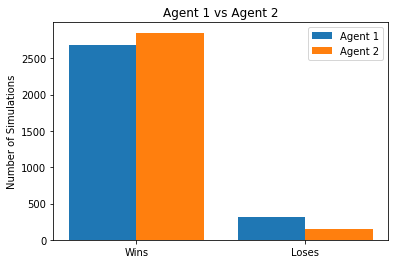

In [ ]:
#@title Comparison of Agent 1 and 2
X = ['Wins','Loses']
agent1 = [2687,313]
agent2 = [2853,147]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, agent1, 0.4, label = 'Agent 1')
plt.bar(X_axis + 0.2, agent2, 0.4, label = 'Agent 2')  
plt.xticks(X_axis, X)
plt.ylabel("Number of Simulations")
plt.title("Agent 1 vs Agent 2")
plt.legend()
plt.show()

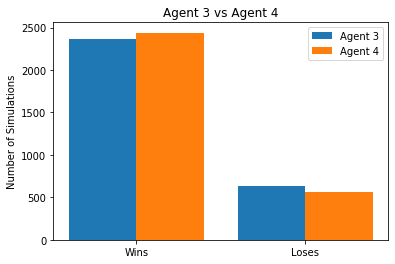

In [ ]:
#@title Comparison of Agent 3 and Agent 4
X = ['Wins','Loses']
agent3 = [2361,639]
agent4 = [2439,561]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, agent3, 0.4, label = 'Agent 3')
plt.bar(X_axis + 0.2, agent4, 0.4, label = 'Agent 4')  
plt.xticks(X_axis, X)
plt.ylabel("Number of Simulations")
plt.title("Agent 3 vs Agent 4")
plt.legend()
plt.show()

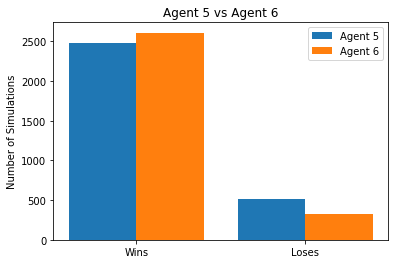

In [ ]:
#@title Comparison of Agent 5 and Agent 6
X = ['Wins','Loses']
agent5 = [2481,519]
agent6 = [2609,319]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, agent5, 0.4, label = 'Agent 5')
plt.bar(X_axis + 0.2, agent6, 0.4, label = 'Agent 6')  
plt.xticks(X_axis, X)
plt.ylabel("Number of Simulations")
plt.title("Agent 5 vs Agent 6")
plt.legend()
plt.show()

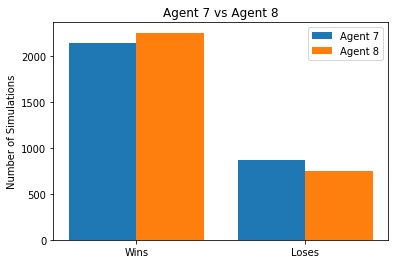

In [ ]:
#@title Comparison of Agent 7 and Agent 8
X = ['Wins','Loses']
agent7 = [2136,864]
agent8 = [2252,748]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, agent7, 0.4, label = 'Agent 7')
plt.bar(X_axis + 0.2, agent8, 0.4, label = 'Agent 8')  
plt.xticks(X_axis, X)
plt.ylabel("Number of Simulations")
plt.title("Agent 7 vs Agent 8")
plt.legend()
plt.show()


# Faulty Drone without updating belief states


In [ ]:
#@title Calculating Bayesian Probabilities for the Predator- Faulty Drone (without updating belief states)
class BayesianPredator():
  def __init__(self): #initialising belief states now and at next timestep
    self.belief_state = {}
    self.belief_state_t = {}

  def initialBeliefState(self): #belief state at start P(predator node)=1
    for i in range(1, g.size+1):
      if i == predator.node:
        self.belief_state[i] = 1
      else:
        self.belief_state[i] = 0
    self.belief_state_t = self.belief_state.copy()
 
  #for finding propagating probablities for when the survey node finds the prey for the first time
  def marginalization(self, surveyNode, predPos,predator_movements):
    for i in range(1, g.size+1):
      prob = 0
      for neighbour in g.graph[i]:
          prob += 0.4*round(self.belief_state[neighbour]/(len(g.graph[neighbour])),3)
      if i in predator_movements:
        self.belief_state_t[i] = round(prob + 0.6/len(predator_movements),3)
      else:
        self.belief_state_t[i] = round(prob, 3)

  def conditionalFactoring(self,surveyNode, predPos, pred_found_count, random_variable):
    if surveyNode == predPos and (random_variable > 0.1): #if pred found we update present belief state i.e., P(surveynode)=1 else we propogate the probabilities
      pred_found_count+=1
      for i in range(1, g.size+1):
        if i == surveyNode:
          self.belief_state[i] = 1
        else:
          self.belief_state[i] = 0  
    elif (surveyNode == predPos and (random_variable <= 0.1)) or surveyNode != predPos:
      for i in range(1, g.size+1):
        if i == surveyNode:
          self.belief_state_t[i] = 0
        else:
          self.belief_state_t[i] = round(self.belief_state[i]/(1-self.belief_state[surveyNode]),3)
    return pred_found_count

In [ ]:
#@title Calculating Bayesian Probabilities for the Prey- Faulty Drone (without updating belief states)
class BayesianPrey():
  def __init__(self): #initialising belief states now and at next timestep
    self.belief_state = {}
    self.belief_state_t = {}

  def initialBeliefState(self, agent_pos): #belief state at start with no survey node
    for i in range(1, g.size+1):
      if i == agent_pos:
        self.belief_state[i] = 0
      else:
        self.belief_state[i] = round(1/(g.size-1),3) #P(node)=1/49
    self.belief_state_t = self.belief_state.copy()
  
  #for finding propagating probablities for when the survey node finds the prey for the first time
  def marginalization(self, surveyNode, preyPos):
    for i in range(1, g.size+1):
      prob = round(self.belief_state[i]/(len(g.graph[i])+1),3)
      for neighbour in g.graph[i]:
        prob += round(self.belief_state[neighbour]/(len(g.graph[neighbour])+1),3)
        self.belief_state_t[i] = round(prob,3)

  def conditionalFactoring(self,surveyNode, preyPos, prey_found, prey_found_count,random_variable):
    if surveyNode == preyPos and (random_variable > 0.1): #if prey found we update present belief state i.e., P(surveynode)=1
      prey_found_count+=1
      prey_found = True
      for i in range(1, g.size+1):
        if i == surveyNode:
          self.belief_state[i] = 1
        else:
          self.belief_state[i] = 0  
    elif (surveyNode == preyPos and random_variable <= 0.1) or surveyNode != preyPos:
      if prey_found: #if prey found once and prey not at survey node, we update belief state 
        temp = self.belief_state[surveyNode]
        for i in range(1, g.size+1):
          if i == surveyNode:
            self.belief_state[i] = 0
          else:
            self.belief_state[i] = round(self.belief_state[i]/(1-temp),3) #propogate probsbilities of the surveynode to the other nodes
      else:
        for i in range(1, g.size+1): #if prey not found once and prey not at survey node, we update belief state at t
          if i == surveyNode:
            self.belief_state_t[i] = 0
          else:
            self.belief_state_t[i] = round(self.belief_state[i]/(1-self.belief_state[surveyNode]),3) #propogate probsbilities of the surveynode to the other nodes
    return prey_found, prey_found_count

In [ ]:
#@title Agent 7- Faulty Drone (without updating belief states)
class Agent7():
  def __init__(self):
    self.node = random.randrange(1, g.size+1)
    
  def move_agent(self, prey_found, prey_found_count, pred_found_count):
      max_pred_pos = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      survey_node=random.choice(max_pred_pos)
      random_variable=random.random()
      predator_movements = com_func.findShortestPaths(predator.node, self.node)
      pred_found_count=bn_pred.conditionalFactoring(survey_node, predator.node, pred_found_count,random_variable)
      bn_pred.marginalization(survey_node, predator.node,predator_movements)
      bn_pred.belief_state=bn_pred.belief_state_t.copy()

      prey_found, prey_found_count=bn_prey.conditionalFactoring(survey_node, prey.node, prey_found, prey_found_count, random_variable)
      if prey_found:
        bn_prey.marginalization(survey_node, prey.node)
      bn_prey.belief_state=bn_prey.belief_state_t.copy()
      max_predicted_prednode = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      proximity = 10000 #breaking ties from amongst the same probability of nodes by finding the closest predator node to agent
      for mpp in max_predicted_prednode:
        stat, route = com_func.bfs(self.node, mpp)
        if proximity > len(route):
          proximity = len(route)
          predicted_prednode = mpp
      
      max_predicted_preynode = [key for key, value in bn_prey.belief_state_t.items() if value == max(bn_prey.belief_state_t.values())]
      predicted_preynode=random.choice(max_predicted_preynode) #finding the predicted prey node from the belief state with the highest probability

      neighbours=g.graph[self.node].copy()
      combined_dist = {}
      statusPred, path_to_predator = com_func.bfs(self.node, predicted_prednode) #predicted predator distance to agent
      statusPrey, path_to_prey = com_func.bfs(self.node, predicted_preynode) #predicted prey distance to agent
      curr_predDist, curr_preyDist = len(path_to_predator), len(path_to_prey)
      for neighbour in neighbours:
        status1, path1 = com_func.bfs(neighbour, predicted_preynode) #predicted prey distance to neighbour of the agent
        status2, path2 = com_func.bfs(neighbour, predicted_prednode) #predicted predator distance to neighbour of the agent
        combined_dist[neighbour] = [len(path1), len(path2)]
      options = {}
      for node, dist in combined_dist.items () :
        if curr_preyDist > dist[0] and curr_predDist < dist[1]: # Case 1 and 2 combined
          options [node] = dist
        elif curr_preyDist  >= dist[0] and curr_predDist <= dist[1]: # Case 3 and 4
          options [node]= dist
        elif curr_predDist  <= dist[1]: # case 5 and 6
          options[node]= dist
      d = sorted(options.items(), key=lambda item: (item[1][0], -item[1][1]))
      if len(d) != 0:
        self.node = d[0][0]
      return prey_found, prey_found_count, pred_found_count

prey_found = False
agent7 = Agent7()
bn_pred = BayesianPredator()
bn_pred.initialBeliefState()
bn_prey = BayesianPrey()
bn_prey.initialBeliefState(agent7.node)
prey_found_count, pred_found_count=0,0
prey_found, prey_found_count, pred_found_count = agent7.move_agent(prey_found, prey_found_count, pred_found_count)

In [ ]:
#@title Agent 7 Game- Faulty Drone (without updating belief states)
total_wins7, total_losses7 = 0,0
simulation_hung=0
pred_found_timestep7, prey_found_timestep7=[],[]
for j in range(30): #simulating for 30 different graphs
  win, lose =0,0
  g = Graph()
  for i in range(1, g.size):
      g.addEdge(i,i+1)
  g.increaseEdge()
  for i in range(1,101):
    agent7 = Agent7()
    predator = Predator()
    prey = Prey()
    while agent7.node == prey.node and agent7.node == predator.node:
      agent7 = Agent7()
      predator = Predator()
      prey = Prey()
    prey_found=False
    bn_prey.initialBeliefState(agent7.node)
    bn_pred.initialBeliefState()
    timestep=1
    while agent7.node!=prey.node and agent7.node!=predator.node:
      prey_found, prey_found_count, pred_found_count=agent7.move_agent(prey_found, prey_found_count, pred_found_count)
      predator.move_predator(agent7.node)
      prey.move_prey()
      timestep+=1
      if timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
        simulation_hung+=1
        break
    pred_found_timestep7.append((pred_found_count/timestep)*100)
    pred_found_count=0
    prey_found_timestep7.append((prey_found_count/timestep)*100)
    prey_found_count=0
    if agent7.node==prey.node:
      win += 1
    else:
      lose += 1
  total_losses7 += lose
  total_wins7 += win

print("Wins: ", total_wins7, "Losses: ", total_losses7)
print("Number of times Simulation Hung", simulation_hung)
sum=0
for i in pred_found_timestep7:
  sum+=i
print("Percentage of times Predator Found:",sum/3000)
sum=0
for i in prey_found_timestep7:
  sum+=i
print("Percentage of times Prey Found:",sum/3000)

Wins: 1895 Losses:  1105
Number of times Simulation Hung 0
Percentage of times Predator Found: 9.01
Percentage of times Prey Found: 1.54


In [ ]:
#@title Agent 8- Faulty Drone (without updating belief states)
class Agent8():
  def __init__(self):
    self.node = random.randrange(1, g.size+1)
    
  def move_agent(self, prey_found, prey_found_count, pred_found_count):
      max_pred_pos = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      survey_node=random.choice(max_pred_pos)
      random_variable=random.random()
      predator_movements = com_func.findShortestPaths(predator.node, self.node)
      pred_found_count=bn_pred.conditionalFactoring(survey_node, predator.node, pred_found_count,random_variable)
      bn_pred.marginalization(survey_node, predator.node,predator_movements)
      bn_pred.belief_state=bn_pred.belief_state_t.copy()

      prey_found, prey_found_count=bn_prey.conditionalFactoring(survey_node, prey.node, prey_found, prey_found_count, random_variable)
      if prey_found:
        bn_prey.marginalization(survey_node, prey.node)
      bn_prey.belief_state=bn_prey.belief_state_t.copy()
      max_predicted_prednode = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      proximity = 10000 #breaking ties from amongst the same probability of nodes by finding the closest predator node to agent
      for mpp in max_predicted_prednode:
        stat, route = com_func.bfs(self.node, mpp)
        if proximity > len(route):
          proximity = len(route)
          predicted_prednode = mpp
      
      max_predicted_preynode = [key for key, value in bn_prey.belief_state_t.items() if value == max(bn_prey.belief_state_t.values())]
      predicted_preynode=random.choice(max_predicted_preynode)
      neighbours=g.graph[self.node].copy()
      combined_dist = {}
      statusPred, path_to_predator = com_func.bfs(self.node, predicted_prednode)
      statusPrey, path_to_prey = com_func.bfs(self.node, predicted_preynode)
      curr_predDist, curr_preyDist = len(path_to_predator), len(path_to_prey)
      flag=False
      for neighbour in neighbours:
        status1, path1 = com_func.bfs(neighbour, predicted_preynode)
        status2, path2 = com_func.bfs(neighbour, predicted_prednode)
        combined_dist[neighbour] = [len(path1), len(path2)]
        if len(path2)==1:
          flag=True
      if flag==False:
        options = {}
        for node, dist in combined_dist.items () :
          if curr_preyDist > dist[0] and curr_predDist < dist[1]: # Case 1 and 2 combined
            options [node] = dist
          elif curr_preyDist  >= dist[0] and curr_predDist <= dist[1]: # Case 3 and 4
            options [node]= dist
          elif curr_predDist  <= dist[1]: # case 5 and 6
            options[node]= dist
        d = sorted(options.items(), key=lambda item: (item[1][0], -item[1][1]))
        if len(d) != 0:
          self.node = d[0][0]
      else:
        maxi, max_node=0, 0
        for node, dist in combined_dist.items():
          if dist[1]>maxi:
            maxi, max_node=dist[1], node
        self.node=max_node
      return prey_found, prey_found_count, pred_found_count

prey_found = False
agent8 = Agent8()
bn_pred = BayesianPredator()
bn_pred.initialBeliefState()
bn_prey = BayesianPrey()
bn_prey.initialBeliefState(agent8.node)
prey_found_count, pred_found_count=0,0
prey_found, prey_found_count, pred_found_count = agent8.move_agent(prey_found, prey_found_count, pred_found_count)

In [ ]:
#@title Agent 8 Game- Faulty Drone (without updating belief states)
total_wins8, total_losses8 = 0,0
simulation_hung=0
pred_found_timestep8, prey_found_timestep8=[],[]
for j in range(30): #simulating for 30 different graphs
  win, lose =0,0
  g = Graph()
  for i in range(1, g.size):
      g.addEdge(i,i+1)
  g.increaseEdge()
  for i in range(1,101):
    agent8 = Agent8()
    predator = Predator()
    prey = Prey()
    while agent8.node == prey.node and agent8.node == predator.node:
      agent8 = Agent8()
      predator = Predator()
      prey = Prey()
    prey_found=False
    bn_prey.initialBeliefState(agent8.node)
    bn_pred.initialBeliefState()
    timestep=1
    while agent8.node!=prey.node and agent8.node!=predator.node:
      prey_found, prey_found_count, pred_found_count=agent8.move_agent(prey_found, prey_found_count, pred_found_count)
      predator.move_predator(agent8.node)
      prey.move_prey()
      timestep+=1
      if timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
        simulation_hung+=1
        break
    pred_found_timestep8.append((pred_found_count/timestep)*100)
    pred_found_count=0
    prey_found_timestep8.append((prey_found_count/timestep)*100)
    prey_found_count=0
    if agent8.node==prey.node:
      win += 1
    else:
      lose += 1
  total_losses8 += lose
  total_wins8 += win

print("Wins: ", total_wins8, "Losses: ", total_losses8)
print("Number of times Simulation Hung", simulation_hung)
sum=0
for i in pred_found_timestep8:
  sum+=i
print("Percentage of times Predator Found:",sum/3000)
sum=0
for i in prey_found_timestep8:
  sum+=i
print("Percentage of times Prey Found:",sum/3000)

Wins: 1901 Losses:  1099
Number of times Simulation Hung 0
Percentage of times Predator Found: 9.58
Percentage of times Prey Found: 1.55


# Faulty Drone with Upadated Belief States


In [ ]:
#@title Calculating Bayesian Probabilities for the Predator- Faulty Drone (updating belief states)
class BayesianPredator():
  def __init__(self): #initialising belief states now and at next timestep
    self.belief_state = {}
    self.belief_state_t = {}

  def initialBeliefState(self): #belief state at start P(predator node)=1
    for i in range(1, g.size+1):
      if i == predator.node:
        self.belief_state[i] = 1
      else:
        self.belief_state[i] = 0
    self.belief_state_t = self.belief_state.copy()
 
  #for finding propagating probablities for when the survey node finds the prey for the first time
  def marginalization(self, surveyNode, predPos,predator_movements):
    for i in range(1, g.size+1):
      prob = 0
      for neighbour in g.graph[i]:
          prob += 0.4*round(self.belief_state[neighbour]/(len(g.graph[neighbour])),3)
      if i in predator_movements:
        self.belief_state_t[i] = round(prob + 0.6/len(predator_movements),3)
      else:
        self.belief_state_t[i] = round(prob, 3)

  def conditionalFactoring(self,surveyNode, predPos, pred_found_count, random_variable):
    #if pred found and probability greater then 0.1 then we update present belief state i.e., P(surveynode)=1 else we propogate the probabilities
    if surveyNode == predPos and (random_variable > 0.1): 
      pred_found_count+=1
      for i in range(1, g.size+1):
        if i == surveyNode:
          self.belief_state[i] = 1
        else:
          self.belief_state[i] = 0  
    elif (surveyNode == predPos and (random_variable <= 0.1)) or surveyNode != predPos:
      for i in range(1, g.size+1):
        if i == surveyNode:
          self.belief_state_t[i] = 0.1 #false negative
        else:
          self.belief_state_t[i]=round(self.belief_state[i]- ((self.belief_state[surveyNode]-0.1)/g.size-2),3) #propogating the probabilities according to false negative
    return pred_found_count

In [ ]:
#@title Calculating Bayesian Probabilities for the Prey- Faulty Drone (without updating belief states)
class BayesianPrey():
  def __init__(self): #initialising belief states now and at next timestep
    self.belief_state = {}
    self.belief_state_t = {}

  def initialBeliefState(self, agent_pos): #belief state at start with no survey node
    for i in range(1, g.size+1):
      if i == agent_pos:
        self.belief_state[i] = 0
      else:
        self.belief_state[i] = round(1/(g.size-1),3) #P(node)=1/49
    self.belief_state_t = self.belief_state.copy()
  
  #for finding propagating probablities for when the survey node finds the prey for the first time
  def marginalization(self, surveyNode, preyPos):
    for i in range(1, g.size+1):
      prob = round(self.belief_state[i]/(len(g.graph[i])+1),3)
      for neighbour in g.graph[i]:
        prob += round(self.belief_state[neighbour]/(len(g.graph[neighbour])+1),3)
        self.belief_state_t[i] = round(prob,3)

  def conditionalFactoring(self,surveyNode, preyPos, prey_found, prey_found_count,random_variable):
    if surveyNode == preyPos and (random_variable > 0.1): #if prey found we update present belief state i.e., P(surveynode)=1
      prey_found_count+=1
      prey_found = True
      for i in range(1, g.size+1):
        if i == surveyNode:
          self.belief_state[i] = 1
        else:
          self.belief_state[i] = 0  
    elif (surveyNode == preyPos and random_variable <= 0.1) or surveyNode != preyPos:
      if prey_found: #if prey found once and prey not at survey node, we update belief state 
        temp = self.belief_state[surveyNode]
        for i in range(1, g.size+1):
          if i == surveyNode:
            self.belief_state[i] = 0.1 #false negative
          else:
            self.belief_state[i] = round(self.belief_state[i]- ((self.belief_state[surveyNode]-0.1)/g.size-2),3) #propogating the probabilities according to false negative
      else:
        for i in range(1, g.size+1): #if prey not found once and prey not at survey node, we update belief state at t
          if i == surveyNode:
            self.belief_state_t[i] = 0
          else:
            self.belief_state_t[i] = round(self.belief_state[i]/(1-self.belief_state[surveyNode]),3) #propogate probsbilities of the surveynode to the other nodes
    return prey_found, prey_found_count

In [ ]:
#@title Agent 7- Faulty Drone (updating belief states)
class Agent7():
  def __init__(self):
    self.node = random.randrange(1, g.size+1)
    
  def move_agent(self, prey_found, prey_found_count, pred_found_count):
      max_pred_pos = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      survey_node=random.choice(max_pred_pos)
      random_variable=random.random()
      predator_movements = com_func.findShortestPaths(predator.node, self.node)
      pred_found_count=bn_pred.conditionalFactoring(survey_node, predator.node, pred_found_count,random_variable)
      bn_pred.marginalization(survey_node, predator.node,predator_movements)
      bn_pred.belief_state=bn_pred.belief_state_t.copy()

      prey_found, prey_found_count=bn_prey.conditionalFactoring(survey_node, prey.node, prey_found, prey_found_count, random_variable)
      if prey_found:
        bn_prey.marginalization(survey_node, prey.node)
      bn_prey.belief_state=bn_prey.belief_state_t.copy()
      max_predicted_prednode = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      proximity = 10000 #breaking ties from amongst the same probability of nodes by finding the closest predator node to agent
      for mpp in max_predicted_prednode:
        stat, route = com_func.bfs(self.node, mpp)
        if proximity > len(route):
          proximity = len(route)
          predicted_prednode = mpp
      
      max_predicted_preynode = [key for key, value in bn_prey.belief_state_t.items() if value == max(bn_prey.belief_state_t.values())]
      predicted_preynode=random.choice(max_predicted_preynode) #finding the predicted prey node from the belief state with the highest probability

      neighbours=g.graph[self.node].copy()
      combined_dist = {}
      statusPred, path_to_predator = com_func.bfs(self.node, predicted_prednode) #predicted predator distance to agent
      statusPrey, path_to_prey = com_func.bfs(self.node, predicted_preynode) #predicted prey distance to agent
      curr_predDist, curr_preyDist = len(path_to_predator), len(path_to_prey)
      for neighbour in neighbours:
        status1, path1 = com_func.bfs(neighbour, predicted_preynode) #predicted prey distance to neighbour of the agent
        status2, path2 = com_func.bfs(neighbour, predicted_prednode) #predicted predator distance to neighbour of the agent
        combined_dist[neighbour] = [len(path1), len(path2)]
      options = {}
      for node, dist in combined_dist.items () :
        if curr_preyDist > dist[0] and curr_predDist < dist[1]: # Case 1 and 2 combined
          options [node] = dist
        elif curr_preyDist  >= dist[0] and curr_predDist <= dist[1]: # Case 3 and 4
          options [node]= dist
        elif curr_predDist  <= dist[1]: # case 5 and 6
          options[node]= dist
      d = sorted(options.items(), key=lambda item: (item[1][0], -item[1][1]))
      if len(d) != 0:
        self.node = d[0][0]
      return prey_found, prey_found_count, pred_found_count

prey_found = False
agent7 = Agent7()
bn_pred = BayesianPredator()
bn_pred.initialBeliefState()
bn_prey = BayesianPrey()
bn_prey.initialBeliefState(agent7.node)
prey_found_count, pred_found_count=0,0
prey_found, prey_found_count, pred_found_count = agent7.move_agent(prey_found, prey_found_count, pred_found_count)

In [ ]:
#@title Agent 7 Game- Faulty Drone (updating belief states)
total_wins7, total_losses7 = 0,0
simulation_hung=0
pred_found_timestep7, prey_found_timestep7=[],[]
for j in range(30): #simulating for 30 different graphs
  win, lose =0,0
  g = Graph()
  for i in range(1, g.size):
      g.addEdge(i,i+1)
  g.increaseEdge()
  for i in range(1,101):
    agent7 = Agent7()
    predator = Predator()
    prey = Prey()
    while agent7.node == prey.node and agent7.node == predator.node:
      agent7 = Agent7()
      predator = Predator()
      prey = Prey()
    prey_found=False
    bn_prey.initialBeliefState(agent7.node)
    bn_pred.initialBeliefState()
    timestep=1
    while agent7.node!=prey.node and agent7.node!=predator.node:
      prey_found, prey_found_count, pred_found_count=agent7.move_agent(prey_found, prey_found_count, pred_found_count)
      predator.move_predator(agent7.node)
      prey.move_prey()
      timestep+=1
      if timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
        simulation_hung+=1
        break
    pred_found_timestep7.append((pred_found_count/timestep)*100)
    pred_found_count=0
    prey_found_timestep7.append((prey_found_count/timestep)*100)
    prey_found_count=0
    if agent7.node==prey.node:
      win += 1
    else:
      lose += 1
  total_losses7 += lose
  total_wins7 += win

print("Wins: ", total_wins7, "Losses: ", total_losses7)
print("Number of times Simulation Hung", simulation_hung)
sum=0
for i in pred_found_timestep7:
  sum+=i
print("Percentage of times Predator Found:",sum/3000)
sum=0
for i in prey_found_timestep7:
  sum+=i
print("Percentage of times Prey Found:",sum/3000)

Wins:  1989 Losses:  1020
Number of times Simulation Hung 0
Percentage of times Predator Found: 10.891
Percentage of times Prey Found: 1.68


In [ ]:
#@title Agent 8- Faulty Drone (updating belief states)
class Agent8():
  def __init__(self):
    self.node = random.randrange(1, g.size+1)
    
  def move_agent(self, prey_found, prey_found_count, pred_found_count):
      max_pred_pos = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      survey_node=random.choice(max_pred_pos)
      random_variable=random.random()
      predator_movements = com_func.findShortestPaths(predator.node, self.node)
      pred_found_count=bn_pred.conditionalFactoring(survey_node, predator.node, pred_found_count,random_variable)
      bn_pred.marginalization(survey_node, predator.node,predator_movements)
      bn_pred.belief_state=bn_pred.belief_state_t.copy()

      prey_found, prey_found_count=bn_prey.conditionalFactoring(survey_node, prey.node, prey_found, prey_found_count, random_variable)
      if prey_found:
        bn_prey.marginalization(survey_node, prey.node)
      bn_prey.belief_state=bn_prey.belief_state_t.copy()
      max_predicted_prednode = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      proximity = 10000 #breaking ties from amongst the same probability of nodes by finding the closest predator node to agent
      for mpp in max_predicted_prednode:
        stat, route = com_func.bfs(self.node, mpp)
        if proximity > len(route):
          proximity = len(route)
          predicted_prednode = mpp
      
      max_predicted_preynode = [key for key, value in bn_prey.belief_state_t.items() if value == max(bn_prey.belief_state_t.values())]
      predicted_preynode=random.choice(max_predicted_preynode)
      neighbours=g.graph[self.node].copy()
      combined_dist = {}
      statusPred, path_to_predator = com_func.bfs(self.node, predicted_prednode)
      statusPrey, path_to_prey = com_func.bfs(self.node, predicted_preynode)
      curr_predDist, curr_preyDist = len(path_to_predator), len(path_to_prey)
      flag=False
      for neighbour in neighbours:
        status1, path1 = com_func.bfs(neighbour, predicted_preynode)
        status2, path2 = com_func.bfs(neighbour, predicted_prednode)
        combined_dist[neighbour] = [len(path1), len(path2)]
        if len(path2)==1:
          flag=True
      if flag==False:
        options = {}
        for node, dist in combined_dist.items () :
          if curr_preyDist > dist[0] and curr_predDist < dist[1]: # Case 1 and 2 combined
            options [node] = dist
          elif curr_preyDist  >= dist[0] and curr_predDist <= dist[1]: # Case 3 and 4
            options [node]= dist
          elif curr_predDist  <= dist[1]: # case 5 and 6
            options[node]= dist
        d = sorted(options.items(), key=lambda item: (item[1][0], -item[1][1]))
        if len(d) != 0:
          self.node = d[0][0]
      else:
        maxi, max_node=0, 0
        for node, dist in combined_dist.items():
          if dist[1]>maxi:
            maxi, max_node=dist[1], node
        self.node=max_node
      return prey_found, prey_found_count, pred_found_count

prey_found = False
agent8 = Agent8()
bn_pred = BayesianPredator()
bn_pred.initialBeliefState()
bn_prey = BayesianPrey()
bn_prey.initialBeliefState(agent8.node)
prey_found_count, pred_found_count=0,0
prey_found, prey_found_count, pred_found_count = agent8.move_agent(prey_found, prey_found_count, pred_found_count)

In [ ]:
#@title Agent 8 Game- Faulty Drone (updating belief states)
total_wins8, total_losses8 = 0,0
simulation_hung=0
pred_found_timestep8, prey_found_timestep8=[],[]
for j in range(30): #simulating for 30 different graphs
  win, lose =0,0
  g = Graph()
  for i in range(1, g.size):
      g.addEdge(i,i+1)
  g.increaseEdge()
  for i in range(1,101):
    agent8 = Agent8()
    predator = Predator()
    prey = Prey()
    while agent8.node == prey.node and agent8.node == predator.node:
      agent8 = Agent8()
      predator = Predator()
      prey = Prey()
    prey_found=False
    bn_prey.initialBeliefState(agent8.node)
    bn_pred.initialBeliefState()
    timestep=1
    while agent8.node!=prey.node and agent8.node!=predator.node:
      prey_found, prey_found_count, pred_found_count=agent8.move_agent(prey_found, prey_found_count, pred_found_count)
      predator.move_predator(agent8.node)
      prey.move_prey()
      timestep+=1
      if timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
        simulation_hung+=1
        break
    pred_found_timestep8.append((pred_found_count/timestep)*100)
    pred_found_count=0
    prey_found_timestep8.append((prey_found_count/timestep)*100)
    prey_found_count=0
    if agent8.node==prey.node:
      win += 1
    else:
      lose += 1
  total_losses8 += lose
  total_wins8 += win

print("Wins: ", total_wins8, "Losses: ", total_losses8)
print("Number of times Simulation Hung", simulation_hung)
sum=0
for i in pred_found_timestep8:
  sum+=i
print("Percentage of times Predator Found:",sum/3000)
sum=0
for i in prey_found_timestep8:
  sum+=i
print("Percentage of times Prey Found:",sum/3000)

Wins:  2001 Losses:  999
Number of times Simulation Hung 0
Percentage of times Predator Found: 11.043
Percentage of times Prey Found: 1.73


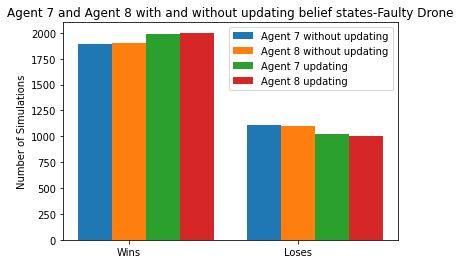

In [ ]:
#@title Comparison of Agent 7 and Agent 8 with and without updating belief states

N = 2
ind = np.arange(N)
width = 0.20
agent7_without= [1895,1105]
agent8_without = [1901,1099]
agent7_with=[1989, 1020]
agent8_with=[2001,999]
X_axis = np.arange(len(X))
plt.bar(ind, agent7_without, width, label = 'Agent 7 without updating')
plt.bar(ind+width, agent8_without, width, label = 'Agent 8 without updating')  
plt.bar(ind+width*2, agent7_with, width, label = 'Agent 7 updating ')
plt.bar(ind+width*3, agent8_with, width, label = 'Agent 8 updating')  
plt.xticks(ind+width, ['Wins','Loses'])
plt.ylabel("Number of Simulations")
plt.title("Agent 7 and Agent 8 with and without updating belief states-Faulty Drone")
plt.legend()
plt.show()

In [ ]:
#@title Agent 9
class Agent9():
  def __init__(self):
    self.node = random.randrange(1, g.size+1)
    
  def move_agent(self, prey_found, prey_found_count, pred_found_count):
      max_pred_pos = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      max_prey_pos= [key for key, value in bn_prey.belief_state_t.items() if value == max(bn_prey.belief_state_t.values())]
      a=random.choice(max_prey_pos)
      b=random.choice(max_pred_pos)
      if bn_prey.belief_state_t[a]>bn_pred.belief_state_t[b]:
        survey_node=a
      else:
        survey_node=b

      random_variable=random.random()
      predator_movements = com_func.findShortestPaths(predator.node, self.node)
      pred_found_count=bn_pred.conditionalFactoring(survey_node, predator.node, pred_found_count,random_variable)
      bn_pred.marginalization(survey_node, predator.node,predator_movements)
      bn_pred.belief_state=bn_pred.belief_state_t.copy()

      prey_found, prey_found_count=bn_prey.conditionalFactoring(survey_node, prey.node, prey_found, prey_found_count, random_variable)
      if prey_found:
        bn_prey.marginalization(survey_node, prey.node)
      bn_prey.belief_state=bn_prey.belief_state_t.copy()
      max_predicted_prednode = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
      proximity = 10000 #breaking ties from amongst the same probability of nodes by finding the closest predator node to agent
      for mpp in max_predicted_prednode:
        stat, route = com_func.bfs(self.node, mpp)
        if proximity > len(route):
          proximity = len(route)
          predicted_prednode = mpp
      
      max_predicted_preynode = [key for key, value in bn_prey.belief_state_t.items() if value == max(bn_prey.belief_state_t.values())]
      predicted_preynode=random.choice(max_predicted_preynode)
      neighbours=g.graph[self.node].copy()
      combined_dist = {}
      statusPred, path_to_predator = com_func.bfs(self.node, predicted_prednode)
      statusPrey, path_to_prey = com_func.bfs(self.node, predicted_preynode)
      curr_predDist, curr_preyDist = len(path_to_predator), len(path_to_prey)
      flag=False
      for neighbour in neighbours:
        status1, path1 = com_func.bfs(neighbour, predicted_preynode)
        status2, path2 = com_func.bfs(neighbour, predicted_prednode)
        combined_dist[neighbour] = [len(path1), len(path2)]
        if len(path2)==1:
          flag=True
      if flag==False:
        options = {}
        for node, dist in combined_dist.items () :
          if curr_preyDist > dist[0] and curr_predDist < dist[1]: # Case 1 and 2 combined
            options [node] = dist
          elif curr_preyDist  >= dist[0] and curr_predDist <= dist[1]: # Case 3 and 4
            options [node]= dist
          elif curr_predDist  <= dist[1]: # case 5 and 6
            options[node]= dist
        d = sorted(options.items(), key=lambda item: (item[1][0], -item[1][1]))
        if len(d) != 0:
          self.node = d[0][0]
      else:
        maxi, max_node=0, 0
        for node, dist in combined_dist.items():
          if dist[1]>maxi:
            maxi, max_node=dist[1], node
        self.node=max_node
      return prey_found, prey_found_count, pred_found_count

prey_found = False
agent9 = Agent9()
bn_pred = BayesianPredator()
bn_pred.initialBeliefState()
bn_prey = BayesianPrey()
bn_prey.initialBeliefState(agent9.node)
prey_found_count, pred_found_count=0,0
prey_found, prey_found_count, pred_found_count = agent9.move_agent(prey_found, prey_found_count, pred_found_count)

In [ ]:
#@title Agent 9 Game
total_wins9, total_losses9 = 0,0
simulation_hung=0
pred_found_timestep9, prey_found_timestep9=[],[]
for j in range(30): #simulating for 30 different graphs
  win, lose =0,0
  g = Graph()
  for i in range(1, g.size):
      g.addEdge(i,i+1)
  g.increaseEdge()
  for i in range(1,101):
    agent9 = Agent9()
    predator = Predator()
    prey = Prey()
    while agent9.node == prey.node and agent9.node == predator.node:
      agent9 = Agent9()
      predator = Predator()
      prey = Prey()
    prey_found=False
    bn_prey.initialBeliefState(agent9.node)
    bn_pred.initialBeliefState()
    timestep=1
    while agent9.node!=prey.node and agent9.node!=predator.node:
      prey_found, prey_found_count, pred_found_count=agent9.move_agent(prey_found, prey_found_count, pred_found_count)
      predator.move_predator(agent9.node)
      prey.move_prey()
      timestep+=1
      if timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
        simulation_hung+=1
        break
    pred_found_timestep9.append((pred_found_count/timestep)*100)
    pred_found_count=0
    prey_found_timestep9.append((prey_found_count/timestep)*100)
    prey_found_count=0
    if agent9.node==prey.node:
      win += 1
    else:
      lose += 1
  total_losses9 += lose
  total_wins9 += win

print("Wins: ", total_wins9, "Losses: ", total_losses9)
print("Number of times Simulation Hung", simulation_hung)
sum=0
for i in pred_found_timestep9:
  sum+=i
print("Percentage of times Predator Found:",sum/3000)
sum=0
for i in prey_found_timestep9:
  sum+=i
print("Percentage of times Prey Found:",sum/3000)

Wins:  2030 Losses:  970
Number of times Simulation Hung 0
Percentage of times Predator Found: 10.91
Percentage of times Prey Found: 1.6798


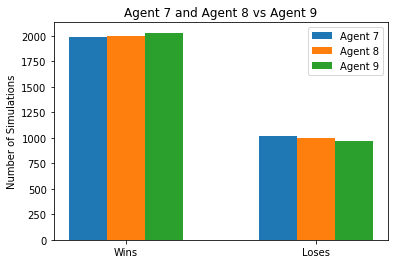

In [ ]:
#@title Agent 7 and Agent 8 vs Agent 9
N = 2
ind = np.arange(N)
width = 0.20
agent7_with=[1989, 1020]
agent8_with=[2001,999]
agent9=[2030,970]
X_axis = np.arange(len(X))
plt.bar(ind, agent7_with, width, label = 'Agent 7')
plt.bar(ind+width, agent8_with, width, label = 'Agent 8')  
plt.bar(ind+width*2, agent9, width, label = 'Agent 9')
plt.xticks(ind+width, ['Wins','Loses'])
plt.ylabel("Number of Simulations")
plt.title("Agent 7 and Agent 8 vs Agent 9")
plt.legend()
plt.show()

# Bonus

In [ ]:
#@title Agent 10
class Agent10():
  def __init__(self):
    self.node = random.randrange(1, g.size+1)
    
  def move_agent(self, prey_found, prey_found_count, pred_found_count,total_steps,timestep):
      if timestep<=total_steps and not prey_found:
        max_prey_pos = [key for key, value in bn_prey.belief_state_t.items() if value == max(bn_prey.belief_state_t.values())]
        survey_node=random.choice(max_prey_pos)

        prey_found, prey_found_count=bn_prey.conditionalFactoring(survey_node, prey.node, prey_found, prey_found_count)
        if prey_found:
          bn_prey.marginalization(survey_node, prey.node)
        bn_prey.belief_state=bn_prey.belief_state_t.copy()

        if predator.node==survey_node:
          statusPred, path_to_predator = com_func.bfs(agent10.node, predator.node)
          total_steps=len(path_to_predator)-5
          timestep=1
        predator_movements = com_func.findShortestPaths(predator.node, self.node)
        pred_found_count=bn_pred.conditionalFactoring(survey_node, predator.node, pred_found_count)
        bn_pred.marginalization(survey_node, predator.node,predator_movements)
        bn_pred.belief_state=bn_pred.belief_state_t.copy()

      if (timestep>total_steps and timestep%2==0) or (prey_found and timestep%2==0):
        max_pred_pos = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
        max_prey_pos= [key for key, value in bn_prey.belief_state_t.items() if value == max(bn_prey.belief_state_t.values())]
        a=random.choice(max_prey_pos)
        b=random.choice(max_pred_pos)
        if bn_prey.belief_state_t[a]>bn_pred.belief_state_t[b]:
          survey_node=a
        else:
          survey_node=b

        if predator.node==survey_node:
          statusPred, path_to_predator = com_func.bfs(agent10.node, predator.node)
          total_steps=len(path_to_predator)-5
          timestep=1
        predator_movements = com_func.findShortestPaths(predator.node, self.node)
        pred_found_count=bn_pred.conditionalFactoring(survey_node, predator.node, pred_found_count)
        bn_pred.marginalization(survey_node, predator.node,predator_movements)
        bn_pred.belief_state=bn_pred.belief_state_t.copy()

        prey_found, prey_found_count=bn_prey.conditionalFactoring(survey_node, prey.node, prey_found, prey_found_count)
        if prey_found:
          bn_prey.marginalization(survey_node, prey.node)
        bn_prey.belief_state=bn_prey.belief_state_t.copy()
      
      if (timestep>total_steps and timestep%2!=0) or  (prey_found and timestep%2!=0):
        max_predicted_prednode = [key for key, value in bn_pred.belief_state_t.items() if value == max(bn_pred.belief_state_t.values())]
        proximity = 10000 #breaking ties from amongst the same probability of nodes by finding the closest predator node to agent
        for mpp in max_predicted_prednode:
          stat, route = com_func.bfs(self.node, mpp)
          if proximity > len(route):
            proximity = len(route)
            predicted_prednode = mpp
        
        max_predicted_preynode = [key for key, value in bn_prey.belief_state_t.items() if value == max(bn_prey.belief_state_t.values())]
        predicted_preynode=random.choice(max_predicted_preynode)
        neighbours=g.graph[self.node].copy()
        combined_dist = {}
        statusPred, path_to_predator = com_func.bfs(self.node, predicted_prednode)
        statusPrey, path_to_prey = com_func.bfs(self.node, predicted_preynode)
        curr_predDist, curr_preyDist = len(path_to_predator), len(path_to_prey)
        flag=False
        for neighbour in neighbours:
          status1, path1 = com_func.bfs(neighbour, predicted_preynode)
          status2, path2 = com_func.bfs(neighbour, predicted_prednode)
          combined_dist[neighbour] = [len(path1), len(path2)]
          if len(path2)==1:
            flag=True
        if flag==False:
          options = {}
          for node, dist in combined_dist.items () :
            if curr_preyDist > dist[0] and curr_predDist < dist[1]: # Case 1 and 2 combined
              options [node] = dist
            elif curr_preyDist  >= dist[0] and curr_predDist <= dist[1]: # Case 3 and 4
              options [node]= dist
            elif curr_predDist  <= dist[1]: # case 5 and 6
              options[node]= dist
          d = sorted(options.items(), key=lambda item: (item[1][0], -item[1][1]))
          if len(d) != 0:
            self.node = d[0][0]
        else:
          maxi, max_node=0, 0
          for node, dist in combined_dist.items():
            if dist[1]>maxi:
              maxi, max_node=dist[1], node
          self.node=max_node
      return prey_found, prey_found_count, pred_found_count

prey_found = False
agent10 = Agent10()
bn_pred = BayesianPredator()
bn_pred.initialBeliefState()
bn_prey = BayesianPrey()
bn_prey.initialBeliefState(agent10.node)
statusPred, path_to_predator = com_func.bfs(agent10.node, predator.node)
total_steps=len(path_to_predator)-5
prey_found_count, pred_found_count=0,0
timestep=1
prey_found, prey_found_count, pred_found_count = agent10.move_agent(prey_found, prey_found_count, pred_found_count, total_steps, timestep)

In [ ]:
#@title Agent 10 Game
total_wins10, total_losses10 = 0,0
simulation_hung=0
pred_found_timestep10, prey_found_timestep10=[],[]
for j in range(30): #simulating for 30 different graphs
  win, lose =0,0
  g = Graph()
  for i in range(1, g.size):
      g.addEdge(i,i+1)
  g.increaseEdge()
  for i in range(1,101):
    agent10 = Agent10()
    predator = Predator()
    prey = Prey()
    while agent10.node == prey.node and agent10.node == predator.node:
      agent10 = Agent10()
      predator = Predator()
      prey = Prey()
    prey_found=False
    bn_prey.initialBeliefState(agent10.node)
    bn_pred.initialBeliefState()
    statusPred, path_to_predator = com_func.bfs(agent10.node, predator.node)
    total_steps=len(path_to_predator)-5
    total_timestep=1
    timestep=1
    while agent10.node!=prey.node and agent10.node!=predator.node:
      prey_found, prey_found_count, pred_found_count=agent10.move_agent(prey_found, prey_found_count, pred_found_count,total_steps,timestep)
      predator.move_predator(agent10.node)
      prey.move_prey()
      total_timestep+=1
      timestep+=1
      if total_timestep>5000: #checking if the timestep is greater then 5000 to calculate number of times simulation is hung
        simulation_hung+=1
        break
    pred_found_timestep10.append((pred_found_count/total_timestep)*100)
    pred_found_count=0
    prey_found_timestep10.append((prey_found_count/total_timestep)*100)
    prey_found_count=0
    if agent10.node==prey.node:
      win += 1
    else:
      lose += 1
  total_losses10 += lose
  total_wins10 += win

print("Wins: ", total_wins10, "Losses: ", total_losses10)
print("Number of times Simulation Hung", simulation_hung)
sum=0
for i in pred_found_timestep10:
  sum+=i
print("Percentage of times Predator Found:",sum/3000)
sum=0
for i in prey_found_timestep10:
  sum+=i
print("Percentage of times Prey Found:",sum/3000)

Wins:  1779 Losses:  1221
Number of times Simulation Hung 0
Percentage of times Predator Found: 5.1069
Percentage of times Prey Found: 6.521


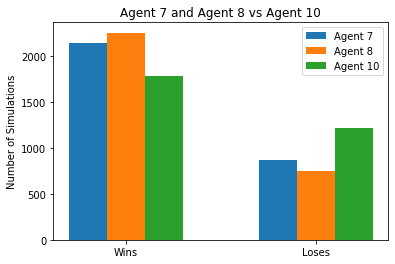

In [ ]:
#@title Comparison of Agent 7, Agent 8 and Agent 10
N = 2
ind = np.arange(N)
width = 0.20
agent7 = [2136,864]
agent8 = [2252,748]
agent10=[1779,1221]
X_axis = np.arange(len(X))
plt.bar(ind, agent7, width, label = 'Agent 7')
plt.bar(ind+width, agent8, width, label = 'Agent 8')  
plt.bar(ind+width*2, agent10, width, label = 'Agent 10')
plt.xticks(ind+width, ['Wins','Loses'])
plt.ylabel("Number of Simulations")
plt.title("Agent 7 and Agent 8 vs Agent 10")
plt.legend()
plt.show()